# ISLP - Question 10
This notebook answers Question 10 from the ISLP (Introduction to Statistical Learning in Python) textbook using the `Carseats` dataset.

In [92]:
# Loading libraries
import pandas as pd
import numpy as np
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize, poly) 
from statsmodels.formula.api import ols
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots

## (a) Fit a multiple regression model to predict Sales using Price, Urban, and US

In [60]:
Carseats = load_data('Carseats')
#model_a = ols('Sales ~ Price + Urban + US', data=Carseats).fit()
#print(model_a.summary())
y = Carseats['Sales']
X = MS(['Price','Urban','US']).fit_transform(Carseats)
model_a = sm.OLS(y, X)
results_a = model_a.fit()
summarize(results_a)

,coef,std err,t,P>|t|
intercept,13.0435,0.651,20.036,0.000
Price,-0.0545,0.005,-10.389,0.000
Urban[Yes],-0.0219,0.272,-0.081,0.936
US[Yes],1.2006,0.259,4.635,0.000


## (b) Interpretation of coefficients
- `Intercept`: Expected Sales when Price is 0, Urban = No, and US = No (13.0435)
- `Price`: Each additional unit increase in Price is associated with a decrease in Sales of 0.0545 units, on average (significant, p < 0.001)
- `Urban[Yes]`: Difference in sales between Urban and non-Urban (p = 0.936)
- `US[Yes]`: US stores sell, on average, 1.2006 more units than non-US stores (significant, p < 0.001).

## (c) Model in equation form
Equation:  
`Sales = β₀ + β₁*Price + β₂*Urban[Yes] + β₃*US[Yes]`  
`Sales = 13.0435 - 0.0545·Price - 0.0219·Urban[Yes] + 1.2006·US[Yes]`
Replacing coefficients:  
`Sales = 13.0435 - 0.0545*Price` (not Urban, not in US)  
`Sales = 13.0216 - 0.0545*Price` (Urban, not in US)  
`Sales = 14.2441 - 0.0545*Price` (not Urban, in US)  
`Sales = 14.2222 - 0.0545*Price` (Urban, in US)

## (d) Significant predictors (p < 0.05)?
Price: Significant (p < 0.001)  
US: Significant (p < 0.001)  
Urban: Not significant (p = 0.936)  
For 'Price' and 'US' We can reject the null hypothesis, but not for 'Urban'

## (e) Fit smaller model with only significant predictors
Since "Urban" is not significant:

In [96]:
#model_e = ols('Sales ~ Price + US', data=Carseats).fit()
#print(model_e.summary())
y_e = Carseats['Sales']
X_e = MS(['Price','US']).fit_transform(Carseats)
model_e = sm.OLS(y_e, X_e)
results_e = model_e.fit()
summarize(results_e)

,coef,std err,t,P>|t|
intercept,13.0308,0.631,20.652,0.0
Price,-0.0545,0.005,-10.416,0.0
US[Yes],1.1996,0.258,4.641,0.0


## (f) Compare model fits
R-squared and RSE:

In [73]:
print('R-squared (model_a):', results_a.rsquared)
print('R-squared (model_e):', results_e.rsquared)
print('RSE (model_a):', np.sqrt(results_a.scale))
print('RSE (model_e):', np.sqrt(results_e.scale))

R-squared (model_a): 0.23927539218405547
R-squared (model_e): 0.23926288842678567
RSE (model_a): 2.4724924402701642
RSE (model_e): 2.469396800574444


Both models show similar R2 values, while model (e) has a better RSE (smaller value) and less complexity.

## (g) 95% confidence intervals

In [79]:
results_e.conf_int(alpha=0.05)

,0,1
intercept,11.79032,14.271265
Price,-0.06476,-0.044195
US[Yes],0.69152,1.707766


## (h) Check for outliers or high leverage

High leverage point indices: [ 42 125 165 174 313 367]


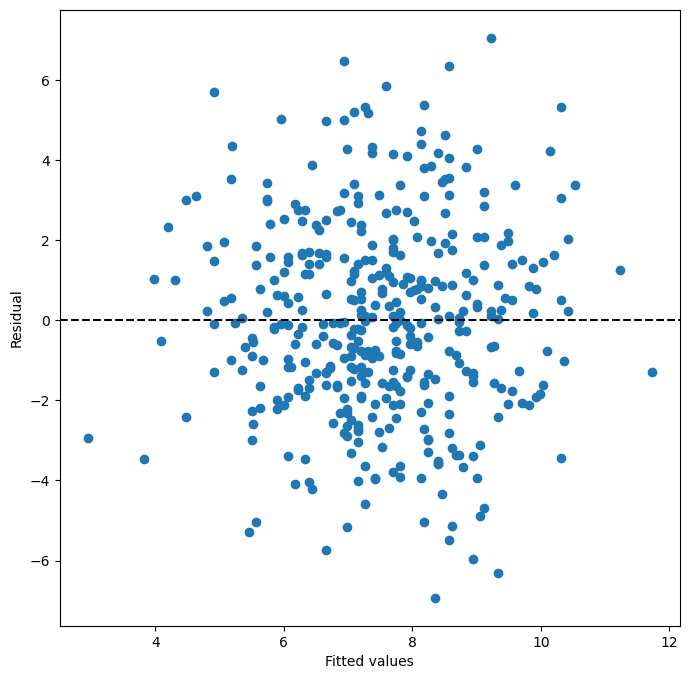

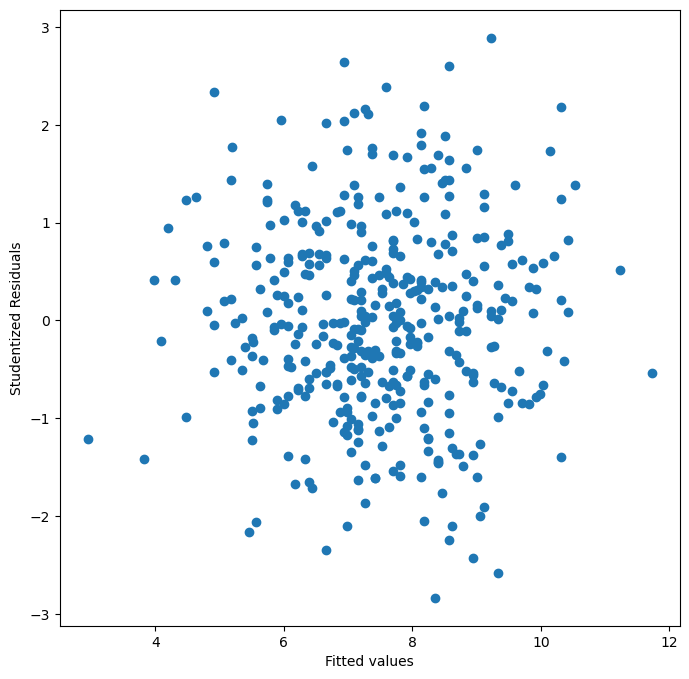

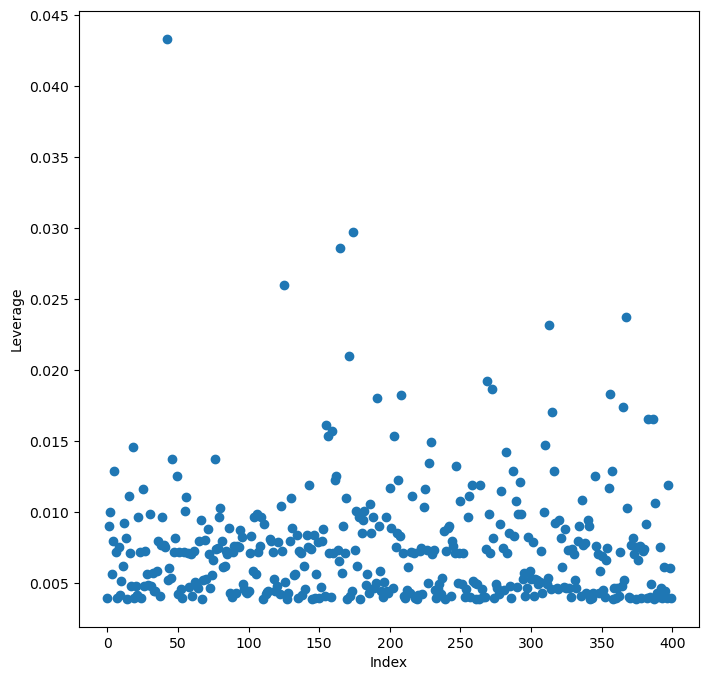

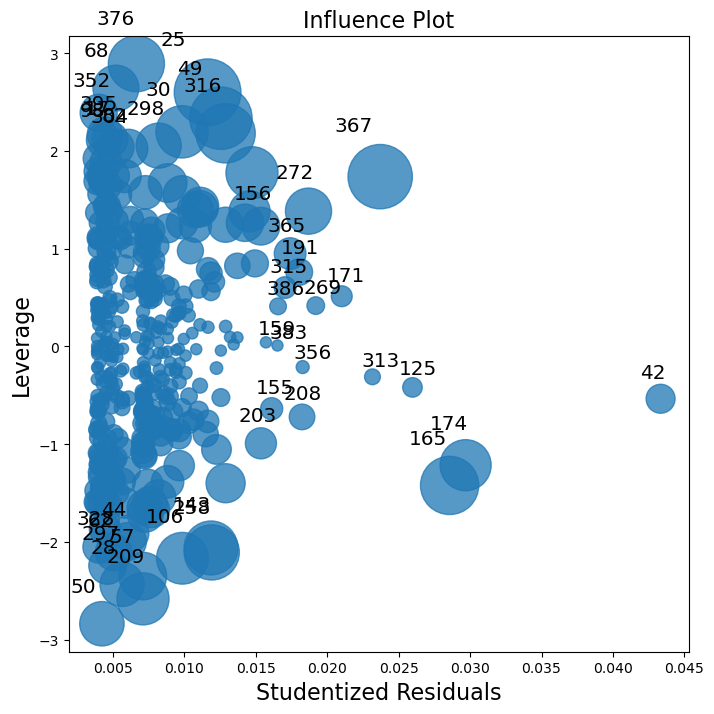

In [142]:
# Residuals Plot
ax = subplots(figsize=(8,8))[1]
ax.scatter(results_e.fittedvalues, results_e.resid)
ax.set_xlabel('Fitted values')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--')
# Studentized Residuals Plot
ax = subplots(figsize=(8,8))[1]
ax.scatter(results_e.fittedvalues, results_e.get_influence().resid_studentized_external)
ax.set_xlabel('Fitted values')
ax.set_ylabel('Studentized Residuals')
# Plot the leverage stats
infl = results_e.get_influence()
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X_e.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)
# Leverage statistic
ax = subplots(figsize=(8, 8))[1]
sm.graphics.influence_plot(results_e, ax=ax, criterion="cooks")
ax.set_xlabel("Studentized Residuals")
ax.set_ylabel("Leverage")
# High leverage points
leverage = results_e.get_influence().hat_matrix_diag
p = model_e.df_model
n = model_e.nobs
avg_leverage = (p + 1) / n
high_leverage = np.where(leverage > 3 * avg_leverage)[0]
print(f"High leverage point indices: {high_leverage}")

Residual plot or Studentized residual plots do not show outliers (no observation with studentized residuals greater than 3)
There seem to be few high leverage points, noticably 42.